# Lesson 06: Linear Regression — Task
## Predicting Occupation Wages with Real BLS Data

**AI/ML Course | Medina County Career Center**

In this task, you'll apply the same linear regression workflow from the walkthrough — but now with real-world data from the **U.S. Bureau of Labor Statistics**, covering 826 occupations.

**The big question:** *What characteristics of a job predict how much it pays?*

> **Syntax note:** All the code is written for you. Your job is to **fill in variable names** where you see `________` and **answer the response questions** in the markdown cells.

> **Data source:** [U.S. Bureau of Labor Statistics — Employment Projections](https://data.bls.gov/projections/occupationProj)

---
## Data Dictionary

Before touching any code, read through what each column in the dataset represents:

| Column | Type | Description |
|--------|------|-------------|
| `Occupation` | Text | Job title (e.g., "Registered nurses", "Electricians") |
| `Education_Level` | Numeric | Typical education required (1–8 scale, see below) |
| `Experience_Required` | Numeric | Work experience needed: **1** = None, **2** = Less than 5 years, **3** = 5+ years |
| `Training_Required` | Numeric | On-the-job training needed (1–6 scale, see below) |
| `Workers_Thousands` | Numeric | Number of people employed in this occupation (in thousands) |
| `Growth_Rate_Pct` | Numeric | Projected job growth from 2024–2034 (percent change) |
| `Annual_Openings_Thousands` | Numeric | Average yearly job openings (in thousands) |
| `Median_Annual_Wage` | Numeric | Median annual salary in dollars (2024) |

### Education Level Scale
| Value | Meaning |
|-------|---------|
| 1 | No formal credential |
| 2 | High school diploma |
| 3 | Some college, no degree |
| 4 | Postsecondary nondegree award |
| 5 | Associate's degree |
| 6 | Bachelor's degree |
| 7 | Master's degree |
| 8 | Doctoral or professional degree |

### Training Required Scale
| Value | Meaning |
|-------|---------|
| 1 | None |
| 2 | Short-term on-the-job training |
| 3 | Moderate-term on-the-job training |
| 4 | Long-term on-the-job training |
| 5 | Apprenticeship |
| 6 | Internship/residency |

---
## Choosing a Target Variable

Your **target** is the variable you want your model to predict.

### Recommended: `Median_Annual_Wage`
This is the salary for each occupation — **"What characteristics of a job predict how much it pays?"**

### Avoid as targets:
- **`Occupation`** — it's text, not a number
- Don't use **`Workers_Thousands`** and **`Annual_Openings_Thousands`** together (one as target, one as feature) — they measure the same thing (job market size) in two ways

---
## Step 1: Setup and Load Data
Run this cell to import libraries and load the dataset. Nothing to change here.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
np.random.seed(42)

# Load the BLS occupation wages dataset
jobData = pd.read_csv('BLS_Occupation_Wages.csv')

print(f"Loaded {len(jobData)} occupations")
print(f"\nFirst 5 rows:")
print(jobData.head())
print(f"\nData types:")
print(jobData.dtypes)
print(f"\nBasic statistics (numeric columns only):")
print(jobData.describe().round(1))

Loaded 826 occupations

First 5 rows:
                                          Occupation  Education_Level  \
0                           Accountants and auditors                6   
1                                          Actuaries                6   
2                                     Acupuncturists                7   
3     Adhesive bonding machine operators and tenders                2   
4  Administrative law judges, adjudicators, and h...                8   

   Experience_Required  Training_Required  Workers_Thousands  Growth_Rate_Pct  \
0                    1                  1             1579.8              4.6   
1                    1                  4               33.6             21.8   
2                    1                  1               15.3              6.8   
3                    1                  3               12.2              1.0   
4                    3                  2               17.5             -0.7   

   Annual_Openings_Thousands  Median

---
## Step 2/3: Calculate/Visualize Correlations

Let's see how strongly the numeric variables relate to each other. Remember:
- **r = +1.0** → perfect positive relationship
- **r = 0.0** → no relationship  
- **r = -1.0** → perfect negative relationship

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix,
            annot=True, cmap='coolwarm', center=0,
            fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap — BLS Occupation Wage Data', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

NameError: name 'correlationMatrix' is not defined

<Figure size 1000x800 with 0 Axes>

### Response 1:

**a)** Which feature has the strongest correlation with `Median_Annual_Wage`? What is the r value?

**Your answer:** 

**b)** Does that make real-world sense? Why would that feature be connected to higher pay?

**Your answer:** 

---
## Feature Selection Tips

**Use features that describe the job itself:** `Education_Level`, `Experience_Required`, and `Training_Required` are requirements that exist *before* you look at the salary. These make for meaningful predictions.

**Watch out for redundant features:** `Workers_Thousands` and `Annual_Openings_Thousands` are highly correlated (~0.97) — bigger occupations naturally have more openings. Including both adds overlapping information.

**Think about the story:** If you use education + experience + training, your model answers: *"How much does investing in education and skills pay off?"*

---
## Step 4: Choose Your Target and Features
Fill in your choices below.

In [6]:
# ============================================================
# YOUR CHOICES — fill in the blanks
# ============================================================

# What are you predicting?
targetColumn = 'Median_Annual_Wage'

# What features will you use to predict it?  (pick 2-4 column names)
featureColumns = ['Education_Level', 'Experience_Required','Training_Required']

# ============================================================

X = jobData[featureColumns]
y = jobData[targetColumn]

print(f"Target: {targetColumn}")
print(f"Features: {featureColumns}")
print(f"\nFeatures shape: {X.shape}  (rows, columns)")
print(f"Target shape: {y.shape}")

Target: Median_Annual_Wage
Features: ['Education_Level', 'Experience_Required', 'Training_Required']

Features shape: (826, 3)  (rows, columns)
Target shape: (826,)


## Step 5: Split, Train, and Evaluate
These cells split the data, train the model, and show you how it performed. Nothing to change.

In [7]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} occupations")
print(f"Test set:     {len(X_test)} occupations")

Training set: 660 occupations
Test set:     166 occupations


In [8]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("✓ Model trained!")

✓ Model trained!


In [9]:
# Evaluate on test data
predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("MODEL PERFORMANCE ON TEST DATA:")
print(f"  R² Score:  {r2:.4f}  ({r2*100:.1f}%)")
print(f"  MAE:       ${mae:,.0f}")
print(f"\nInterpretation:")
print(f"  The model explains {r2*100:.1f}% of the variation in {targetColumn}.")
print(f"  On average, predictions are off by ${mae:,.0f}.")

MODEL PERFORMANCE ON TEST DATA:
  R² Score:  0.6055  (60.5%)
  MAE:       $18,562

Interpretation:
  The model explains 60.5% of the variation in Median_Annual_Wage.
  On average, predictions are off by $18,562.


### Response 2:

**a)** What is your R² score? In plain English, what does that number tell you about how well the model works?

**Your answer:** all three aren't highly related, but aren't not related

**b)** What is your MAE? Is that a big or small miss for predicting salaries?

**Your answer:** $18,562 big

## Step 6: Predictions vs. Actual
Points close to the red dashed line = good predictions.

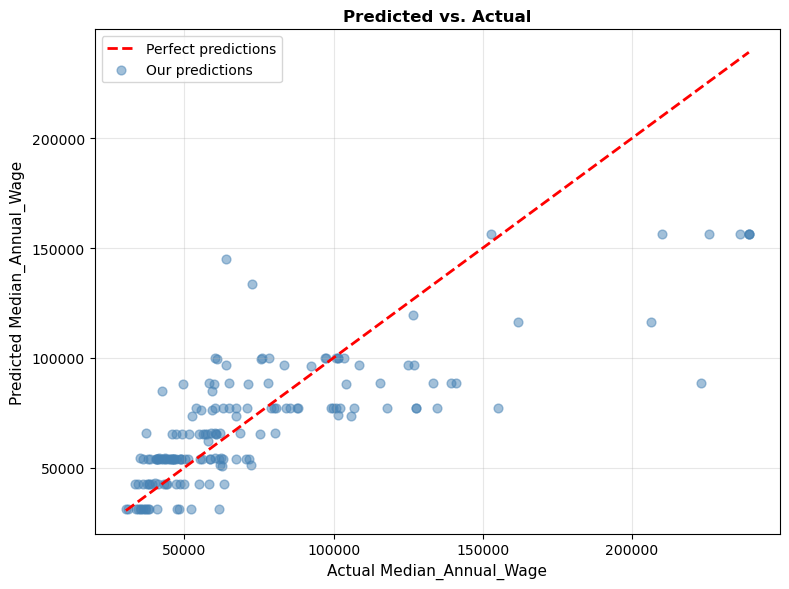

In [10]:
plt.figure(figsize=(8, 6))

minVal = min(y_test.min(), predictions.min())
maxVal = max(y_test.max(), predictions.max())

plt.plot([minVal, maxVal], [minVal, maxVal], 'r--', linewidth=2, label='Perfect predictions')
plt.scatter(y_test, predictions, alpha=0.5, color='steelblue', s=40, label='Our predictions')

plt.xlabel(f'Actual {targetColumn}', fontsize=11)
plt.ylabel(f'Predicted {targetColumn}', fontsize=11)
plt.title('Predicted vs. Actual', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Step 7: What Did the Model Learn?
The coefficients tell us how much each feature pushes the prediction up or down.

In [11]:
coefficientTable = pd.DataFrame({
    'Feature': featureColumns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("WHAT THE MODEL LEARNED:\n")
print("The formula:")
formula = f"  Predicted {targetColumn} = "
terms = [f"({coef:+.2f} × {feat})" for feat, coef in zip(featureColumns, model.coef_)]
formula += " + ".join(terms)
formula += f" + {model.intercept_:.2f}"
print(formula)
print("\nCoefficient table (sorted by impact):")
print(coefficientTable.to_string(index=False))

WHAT THE MODEL LEARNED:

The formula:
  Predicted Median_Annual_Wage = (+11433.98 × Education_Level) + (+19621.16 × Experience_Required) + (+11279.63 × Training_Required) + -22449.11

Coefficient table (sorted by impact):
            Feature  Coefficient
Experience_Required 19621.157201
    Education_Level 11433.975038
  Training_Required 11279.633582


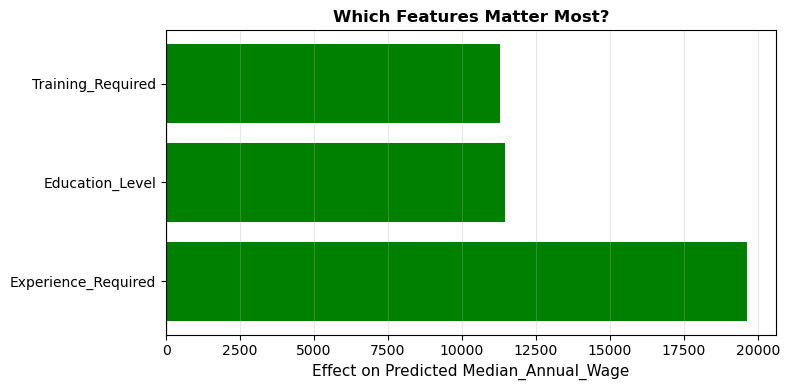

Green bars = positive effect (increases the prediction)
Red bars = negative effect (decreases the prediction)


In [12]:
# Bar chart of feature importance
plt.figure(figsize=(8, 4))
colors = ['green' if c > 0 else 'red' for c in coefficientTable['Coefficient']]
plt.barh(coefficientTable['Feature'], coefficientTable['Coefficient'], color=colors)
plt.xlabel(f'Effect on Predicted {targetColumn}', fontsize=11)
plt.title('Which Features Matter Most?', fontsize=12, fontweight='bold')
plt.axvline(x=0, color='black', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("Green bars = positive effect (increases the prediction)")
print("Red bars = negative effect (decreases the prediction)")

### Response 3:
Which feature has the biggest effect on the prediction? Does the direction (positive/negative) make sense in real life? Explain.

**Your answer:** 

---
## Step 8: Make a Prediction

Think of a career you're interested in. What education and experience does it require? Plug those values in below.

In [14]:
# ============================================================
# YOUR HYPOTHETICAL OCCUPATION — fill in values
# ============================================================

myJob = pd.DataFrame({
    'Education_Level': [6],
    'Experience_Required': [2],
    'Training_Required': [2]
})

myPrediction = model.predict(myJob)[0]

print(f"Your hypothetical occupation:")
for col in myJob.columns:
    print(f"  {col} = {myJob[col].iloc[0]}")
print(f"\nPredicted {targetColumn}: ${myPrediction:,.0f}")

Your hypothetical occupation:
  Education_Level = 6
  Experience_Required = 2
  Training_Required = 2

Predicted Median_Annual_Wage: $107,956


### ✍️ Response 4:
What career were you thinking of? Does the predicted salary seem reasonable? Why or why not?

**Your answer:** 

---
## ✍️ Final Reflection

**a)** Why is it important to test the model on data it wasn't trained on?

**Your answer:** 

**b)** This model can't tell the difference between two jobs that require the same education level (e.g., a software engineer and a social worker both need a Bachelor's degree). What other information would help the model make better predictions?

**Your answer:** have a job id for each job